# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this assignment, you will be asked to find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. You will get a bonus point if you can apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [2]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [ ]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Leonard, Mr. Lionel",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Question 1: Find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

In [4]:
# TODO
print("\nMissing values :  ", titanic.isnull().sum())


Missing values :   PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### **Question 2: Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [5]:
# TODO
#the missing values of column age with the mean of that column.
titanic['Age'].fillna(29.699118, inplace=True)
#the missing values of column Cabin with a constant value 'other'.
titanic['Cabin'].fillna('other', inplace = True)
#the missing values of column Embarked with the mode of that column.
titanic['Embarked'].fillna('S', inplace= True)
print("\nMissing values :  ", titanic.isnull().sum())



Missing values :   PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### **Question 3: What's the name of the person who has the 16th most expensive ticket?**

In [6]:
# TODO
titanic_price = titanic.sort_values('Fare', ascending= False)
#name = display(titanic_price.iloc[15,3])
print("Name of the person who purchased 16th most expensive ticket: {}".format(titanic_price.iloc[15,3]))

Name of the person who purchased 16th most expensive ticket: Farthing, Mr. John


### **Question 4: Out of all the remales who survived, what's the name who has the 6th most expensive ticket?**

In [7]:
# TODO
titanic_survived_Females = titanic.loc[(titanic['Survived']== 1)& (titanic['Sex']== 'female'),['Name','Fare']]
titanic_price_survived = titanic_survived_Females.sort_values('Fare', ascending= False)
print("Name of the female who purchased 6th most expensive ticket and survived: {}".format(titanic_price_survived.iloc[5,0]))

Name of the female who purchased 6th most expensive ticket and survived: Baxter, Mrs. James (Helene DeLaudeniere Chaput)


### **Question 5: Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

In [8]:
# TODO

table = pd.pivot_table(titanic, values='Survived', index=['Sex'],
                    columns=['Pclass'], aggfunc=(np.mean))
print(table)


Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


### **Question 6: Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.

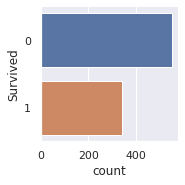

In [9]:
# TODO
ax = sns.catplot(y = 'Survived', kind = 'count', data = titanic , height = 2.5)

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

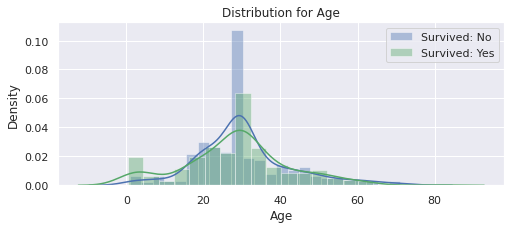

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

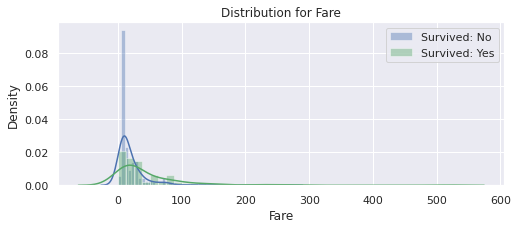

In [10]:
def distplot(feature, frame):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax0 = sns.distplot(frame[frame['Survived'] == 0][feature], color= 'b', label='Survived: No')
    ax1 = sns.distplot(frame[frame['Survived'] == 1][feature], color= 'g', label='Survived: Yes')
    plt.legend()
    plt.show()

numerical_cols = ['Age', titanic]

#  statistics of column Age 
display(titanic['Age'].describe())
distplot('Age', titanic)

#  statistics of column Fare 
display(titanic['Fare'].describe())
distplot('Fare', titanic)

From above visualizations, I can infer below insights
1. As the Fare of the ticket is high there is more chance for people to survive
2. Age played a crucial role in survival rate, as the age of the people is less they have more chance to survive. For example, people with age of 20 has more chance than age of 60 for survival.

### **Question 7: Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


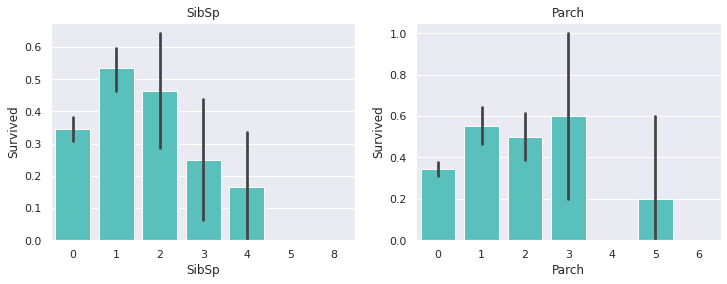

In [11]:
# TODO

fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("SibSp")
axis[1].set_title("Parch")
axis_y = "Survival Rate"

Survivalrate_SibSp= titanic.groupby('SibSp')["Survived"].mean()
print(Survivalrate_SibSp)
sns.barplot('SibSp', 'Survived', data=titanic, color="mediumturquoise",ax=axis[0])

Survivalrate_parch= titanic.groupby('Parch')["Survived"].mean()
print(Survivalrate_parch)
sns.barplot('Parch', 'Survived', data=titanic, color="mediumturquoise",ax=axis[1])

Analysis: From above plot we can say that
1. Passenger with 1 or 2 sibling/spouse had more survival rate than others
2. Passengers with 1 or 3 parents/children had more survival rate than others

### **Question 8: Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

          Survived    Pclass      Name  ...      Fare     Cabin  Embarked
Survived  1.000000  0.247845 -0.005007  ...  0.191981  0.270495  0.106811
Pclass    0.247845  1.000000  0.018305  ...  0.079498  0.187437 -0.168091
Name     -0.005007  0.018305  1.000000  ...  0.299982  0.241918 -0.030467
Sex       0.543351  0.118133 -0.042939  ...  0.137725  0.082104  0.116569
Age       0.037025  0.171190  0.123648  ...  0.117313  0.163002 -0.133308
SibSp    -0.136302 -0.149630 -0.031023  ... -0.046556 -0.108709 -0.030683
Parch     0.086210 -0.000343  0.001206  ...  0.074306 -0.002761 -0.085059
Ticket   -0.047298  0.020431  0.760875  ...  0.303257  0.212438 -0.024655
Fare      0.191981  0.079498  0.299982  ...  1.000000  0.379659  0.076726
Cabin     0.270495  0.187437  0.241918  ...  0.379659  1.000000  0.017685
Embarked  0.106811 -0.168091 -0.030467  ...  0.076726  0.017685  1.000000

[11 rows x 11 columns]


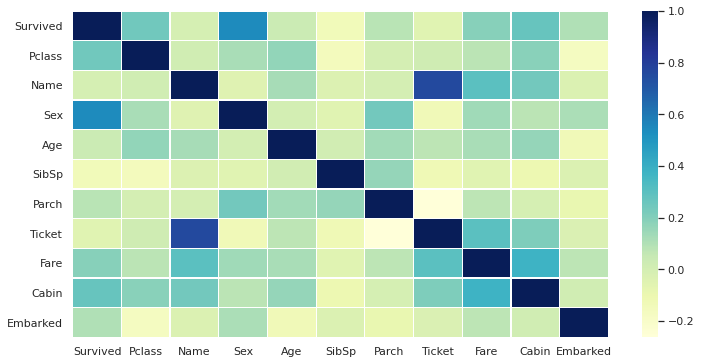

In [ ]:
# TODO
plt.figure(figsize=(12, 6))
corr = titanic[['Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']].apply(lambda x: pd.factorize(x)[0]).corr()
print(corr)
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")

### **Question 9: Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**

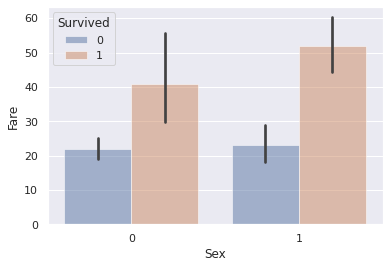

In [ ]:
sns.barplot(x= 'Sex',y='Fare', hue='Survived', alpha=0.5, data=titanic)

From above barplot we can say that 

1. more female passengers purchased high fare tickets than male passengers
2. More female passengers got survived than male passengers

---



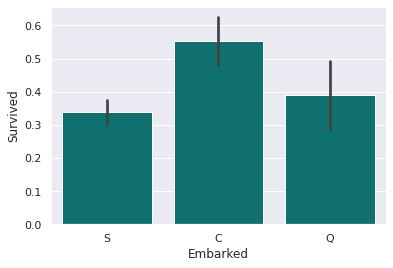

In [ ]:
sns.barplot('Embarked', 'Survived', data=titanic, color="teal")
plt.show()

From the above plot we can say that
1. Passengers who embarked from C (Cherbourg) station were more survived than other stations.

### **Bonus Point: Build a ML model to predict survival.**
Can you build a logistic regression model to predict the probability of survival for all the passengers in this [file](https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv)? You can evaluate your model accuracy on [Kaggle](https://www.kaggle.com/c/titanic). Can you think of any other ways to improve the model performance? Implement your idea to see if it actually works. 

In [ ]:
# TODO
# importing libraries
# evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
# logistic regression
from sklearn.linear_model import LogisticRegression


In [ ]:
#Preparing training data
titanic_train = titanic
titanic_train['Sex'] = titanic_train['Sex'].replace('male',0)
titanic_train['Sex'] = titanic_train['Sex'].replace('female',1)
titanic_train['TravelAlone']=np.where((titanic_train["SibSp"]+titanic_train["Parch"])>0, 0, 1)


In [ ]:
#Preparing test data
test_data = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv')
Pass_id = test_data.loc[:,'PassengerId']
test_x = test_data.loc[:,['Pclass','Age','SibSp','Parch','Fare', 'Sex']]
test_x['Sex'] = test_x['Sex'].replace('male',0)
test_x['Sex'] = test_x['Sex'].replace('female',1)

test_x['Age'].fillna(30.272590, inplace=True)
test_x['Fare'].fillna(35.627188, inplace = True)

#Trail-2 test data
test_x2 = test_x

In [ ]:
test_x2.isnull().sum()

Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex            0
TravelAlone    0
dtype: int64

In [ ]:
# Trail -1 
#model initialization
logistic_regression_model = LogisticRegression()

# train the model
logistic_regression_model.fit(titanic_train.loc[:, ['Pclass','Age','SibSp','Parch','Fare','Sex']], titanic_train['Survived'])

# print model parameters
print('Slope: {}'.format(logistic_regression_model.coef_))
print('Intercept: {}'.format(logistic_regression_model.intercept_))

Slope: [[-1.04833098 -0.0388074  -0.33865864 -0.10110194  0.00301883  2.65215238]]
Intercept: [2.11998586]


In [ ]:
#Trial- 2
logistic_regression_model2 = LogisticRegression()

# train the model
logistic_regression_model2.fit(titanic_train.loc[:, ['Pclass','Age','SibSp','Parch','Fare','Sex','TravelAlone']], titanic_train['Survived'])

# print model parameters
print('Slope: {}'.format(logistic_regression_model2.coef_))
print('Intercept: {}'.format(logistic_regression_model2.intercept_))

Slope: [[-9.98992914e-01 -3.81381284e-02 -5.41377254e-01 -2.54499995e-01
   2.46460598e-03  2.57507676e+00 -7.44562421e-01]]
Intercept: [2.6311523]


In [ ]:
#trail-1
train_x = titanic.loc[:, ['Pclass','Age','SibSp','Parch','Fare','Sex']]
train_y = titanic.loc[:,'Survived']

In [ ]:
#trail-2
train_x2 = titanic.loc[:, ['Pclass','Age','SibSp','Parch','Fare','Sex','TravelAlone']]
train_y2 = titanic.loc[:,'Survived']

In [ ]:
#Prediction on training data
#trail-1 
train_z = logistic_regression_model.predict(train_x)

#trail-2
train_z2 = logistic_regression_model2.predict(train_x2)


In [ ]:
#trail-1
print("model accuracy on training set 1: {}".format(accuracy_score(train_y, train_z)))

#trail-2
print("model accuracy on training set 2: {}".format(accuracy_score(train_y2, train_z2)))

model accuracy on training set 1: 0.797979797979798
model accuracy on training set 2: 0.8035914702581369


In [ ]:
test_x0 = test_x.drop(columns='TravelAlone') #removing a column TravelAlone as it is not used in trail-1

In [ ]:
#Running LRM on test data
#Traail-1
test_z = logistic_regression_model.predict(test_x0)

#Trail-2
test_z2 = logistic_regression_model2.predict(test_x2)



In [ ]:
#Preparing Test results to verify on Kaggle

new_df = Pass_id.copy()

#Trail-1
a= pd.DataFrame({
    'Survived':test_z
})

#trail-2
a2= pd.DataFrame({
    'Survived':test_z2
})


In [ ]:
#Trail-1
result = pd.concat([new_df,a],axis=1)
print(result)

#trail-2
result2 = pd.concat([new_df,a2],axis=1)
print(result2)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [ ]:
#Exporting results to csv

#Trail-1
result.to_csv('Predict_1.csv')

#Trail-2
result2.to_csv('Predict_2.csv')


In [ ]:
from google.colab import files
files.download("Predict_1.csv")

#files.view("Predict_1.csv")

files.download("Predict_2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Created two models to predict the survival rate of Titanic passengers and verified accuracy with the help of Kaggle.

1. Trail-1: 
Included 6 columns ('Pclass','Age','SibSp','Parch','Fare','Sex') to predict the outcome of survival status. Achieved accuracy around 75.837% 

2. Trail-2: To improvise the model
Considered the impact of 'SibSp','Parch' and created a new column 'Traveling Alone'.
Created model using 7 columns ('Pclass','Age','SibSp','Parch','Fare','Sex','TravelAlone') and accuracy got improved to 76.55%